In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

# BUSINESS PROBLEM - 1

In [2]:
Loans_data = pd.read_csv(r"D:\BA\Python\Basic Exercises\Basic Statistics - Hypothesis Testing\4. Basic Statistics - Hypothesis Testing\LoansData.csv")
Loans_data.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [3]:
Loans_data.columns=Loans_data.columns.str.replace('.','_')
Loans_data.head()

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_15428\2255693045.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Loans_data.columns=Loans_data.columns.str.replace('.','_')


,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [4]:
Loans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2499 non-null   float64
 1   Amount_Funded_By_Investors      2499 non-null   float64
 2   Interest_Rate                   2498 non-null   object 
 3   Loan_Length                     2500 non-null   object 
 4   Loan_Purpose                    2500 non-null   object 
 5   Debt_To_Income_Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home_Ownership                  2499 non-null   object 
 8   Monthly_Income                  2499 non-null   float64
 9   FICO_Range                      2498 non-null   object 
 10  Open_CREDIT_Lines               2497 non-null   float64
 11  Revolving_CREDIT_Balance        2497 non-null   float64
 12  Inquiries_in_the_Last_6_Months  24

In [5]:
Loans_data["Interest_Rate"] = pd.to_numeric(Loans_data['Interest_Rate'].str.replace("%",""),downcast='float')
Loans_data.head()


,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000.0,20000.0,8.90,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [6]:
Loans_data["Loan_Length"] = pd.to_numeric(Loans_data["Loan_Length"].str.replace("months",""))
Loans_data.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000.0,20000.0,8.90,36,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12,36,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98,60,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99,36,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71,36,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [7]:
Loans_data.isnull().sum()

Amount_Requested                   1
Amount_Funded_By_Investors         1
Interest_Rate                      2
Loan_Length                        0
Loan_Purpose                       0
Debt_To_Income_Ratio               1
State                              0
Home_Ownership                     1
Monthly_Income                     1
FICO_Range                         2
Open_CREDIT_Lines                  3
Revolving_CREDIT_Balance           3
Inquiries_in_the_Last_6_Months     3
Employment_Length                 77
dtype: int64

In [8]:
Loans_data.dropna(inplace=True)

In [9]:
Loans_data.isnull().sum()

Amount_Requested                  0
Amount_Funded_By_Investors        0
Interest_Rate                     0
Loan_Length                       0
Loan_Purpose                      0
Debt_To_Income_Ratio              0
State                             0
Home_Ownership                    0
Monthly_Income                    0
FICO_Range                        0
Open_CREDIT_Lines                 0
Revolving_CREDIT_Balance          0
Inquiries_in_the_Last_6_Months    0
Employment_Length                 0
dtype: int64

In [10]:
Loans_data['FICO_Score']=(Loans_data['FICO_Range'].str[0:3].astype(int))+(Loans_data['FICO_Range'].str[4:].astype(int))/2
Loans_data.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,FICO_Score
0,20000.0,20000.0,8.90,36,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year,1104.5
1,19200.0,19200.0,12.12,36,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years,1074.5
2,35000.0,35000.0,21.98,60,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years,1037.0
3,10000.0,9975.0,9.99,36,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years,1044.5
4,12000.0,12000.0,11.71,36,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years,1044.5


In [11]:
p0 = Loans_data['Monthly_Income'].min() # min or p0
p100 =Loans_data['Monthly_Income'].max() # max or p100
p50 = Loans_data['Monthly_Income'].median() # median or p50
p25 = Loans_data['Monthly_Income'].quantile(0.25)
p75 = Loans_data['Monthly_Income'].quantile(0.75)
iqr = p75 - p25
lc = p25 - 1.5 * iqr
uc = p75 + 1.5 * iqr
print('p0 = ', p0)
print('p100 = ', p100)
print("p50 = ", p50)
print("p25 = ", p25)
print("p75 = ", p75)
print("iqr = ", iqr)
print("lc = ", lc)
print("uc = ", uc)

p0 =  588.5
p100 =  102750.0
p50 =  5000.0
p25 =  3500.0
p75 =  6833.33
iqr =  3333.33
lc =  -1499.995
uc =  11833.325


#### hence, we found one outlier on the uppercut.

<AxesSubplot: >

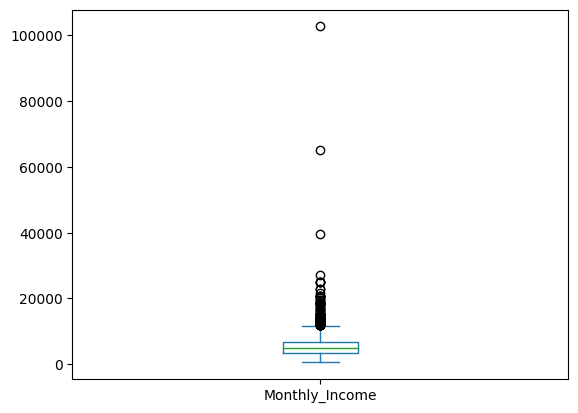

In [12]:
Loans_data['Monthly_Income'].plot(kind = 'box')

In [13]:
Loans_data['Monthly_Income'].clip(upper = uc)

0        6541.67
1        4583.33
2       11500.00
3        3833.33
4        3195.00
          ...   
2495     9250.00
2496     8903.25
2497     2166.67
2498     3500.00
2499     3875.00
Name: Monthly_Income, Length: 2413, dtype: float64

In [14]:
Loans_data.describe()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,FICO_Score
count,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000
mean,12491.556154,12074.038388,13.075591,41.341069,5735.767460,10.106092,15300.304600,0.905097,1060.892458
std,7783.902098,7727.846537,4.158533,9.984987,3993.949136,4.507909,18327.413575,1.236078,52.459300
min,1000.000000,-0.010000,5.420000,36.000000,588.500000,2.000000,0.000000,0.000000,962.000000
25%,6000.000000,6000.000000,10.160000,36.000000,3500.000000,7.000000,5613.000000,0.000000,1022.000000
50%,10000.000000,10000.000000,13.110000,36.000000,5000.000000,9.000000,11016.000000,0.000000,1052.000000
75%,17000.000000,16175.000000,15.800000,36.000000,6833.330000,13.000000,19036.000000,1.000000,1089.500000
max,35000.000000,35000.000000,24.889999,60.000000,102750.000000,38.000000,270800.000000,9.000000,1247.000000


#### a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)
#### H0 : Intrest rate is not varied for different loan amounts
#### H1 : Intrest rate is varied for different loan amounts
#### pvalue = 0.05
#### CI = 95%

In [15]:
stats.pearsonr(Loans_data['Interest_Rate'],Loans_data['Amount_Funded_By_Investors'])

PearsonRResult(statistic=0.3315955294370032, pvalue=5.064264557202981e-63)

##### In this case the pvalue=5.064264557202981e-63 is near to pvalue, hence we reject the null hypothesis and accept the null hypothesis. So we can say that  Intrest rate is varied for different loan amounts.

#### b. Loan length is directly effecting intrest rate.
#### H0 : Loan length is directly not effecting intrest rate.
#### H1 :Loan length is directly effecting intrest rate.
#### pvalue = 0.05
#### CI = 95%

In [16]:
Loans_data['Loan_Length'].value_counts()

36    1876
60     537
Name: Loan_Length, dtype: int64

In [18]:
Loans_data['Loan_Length'].value_counts().mean()

1206.5

In [19]:
Lm_36 = Loans_data.query("Loan_Length == 36 ").Interest_Rate
Lm_36.head()

0     8.90
1    12.12
3     9.99
4    11.71
5    15.31
Name: Interest_Rate, dtype: float32

In [20]:
Lm_60 = Loans_data.query("Loan_Length == 60 ").Interest_Rate
Lm_60.head()

2     21.980000
7     17.139999
12    21.670000
15    15.650000
17    10.370000
Name: Interest_Rate, dtype: float32

In [21]:
stats.ttest_ind(Lm_36,Lm_60)

Ttest_indResult(statistic=-23.05778833892161, pvalue=1.793968996984569e-106)

##### In the above case  pvalue=1.793968996984569e-106 which is less then pvalue so null hypothesis is rejected, hence we can say that Loan length is directly effecting intrest rate.

#### c. Inrest rate varies for different purpose of loans
#### H0 : Inrest rate not varies for different purpose of loans
#### H1 : Inrest rate varies for different purpose of loans
#### pvalue = 0.05
#### CI = 95%

In [22]:
Loans_data.Loan_Purpose.value_counts()

debt_consolidation    1262
credit_card            430
other                  189
home_improvement       147
major_purchase         100
small_business          83
car                     50
wedding                 37
moving                  29
medical                 28
vacation                20
house                   20
educational             14
renewable_energy         4
Name: Loan_Purpose, dtype: int64

In [23]:
debt_consolidation=Loans_data.query('Loan_Purpose=="debt_consolidation"').Interest_Rate
credit_card = Loans_data.query('Loan_Purpose=="credit_card"').Interest_Rate
other = Loans_data.query('Loan_Purpose=="other"').Interest_Rate
home_improvement = Loans_data.query('Loan_Purpose=="home_improvement"').Interest_Rate
major_purchase = Loans_data.query('Loan_Purpose=="major_purchase"').Interest_Rate
small_business = Loans_data.query('Loan_Purpose=="small_business"').Interest_Rate            
car = Loans_data.query('Loan_Purpose=="car"').Interest_Rate
wedding = Loans_data.query('Loan_Purpose=="wedding"').Interest_Rate
medical = Loans_data.query('Loan_Purpose=="medical"').Interest_Rate
moving = Loans_data.query('Loan_Purpose=="moving"').Interest_Rate
vacation = Loans_data.query('Loan_Purpose=="vacation"').Interest_Rate
house = Loans_data.query('Loan_Purpose=="house"').Interest_Rate
educational = Loans_data.query('Loan_Purpose=="educational"').Interest_Rate
renewable_energy = Loans_data.query('Loan_Purpose=="renewable_energy"').Interest_Rate 

In [24]:
stats.f_oneway(debt_consolidation,credit_card,other,home_improvement,major_purchase,small_business,car,wedding,medical,moving,vacation,house,educational,renewable_energy)

F_onewayResult(statistic=7.33083815655656, pvalue=2.7646677084387417e-14)

##### new pvalue=2.7646677084387417e-14 which is less the pvalue, hence null hypothesis is rejected and alternative hypothesis is accepted, so we can say that Inrest rate varies for different purpose of loans. 

#### d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.
#### H0 : There is not any relationship between FICO scores and Home Ownership. 
#### H1 : There is relationship between FICO scores and Home Ownership. 
#### pvalue = 0.05
#### CI = 95%

In [25]:
Loans_data.Home_Ownership.value_counts()

RENT        1110
MORTGAGE    1109
OWN          189
OTHER          5
Name: Home_Ownership, dtype: int64

In [26]:
Rent = Loans_data.query("Home_Ownership == 'RENT'").FICO_Score
Mortgage = Loans_data.query("Home_Ownership == 'MORTGAGE'").FICO_Score
Own = Loans_data.query("Home_Ownership == 'OWN'").FICO_Score
Other = Loans_data.query("Home_Ownership == 'OTHER'").FICO_Score


In [27]:
stats.f_oneway(Rent, Mortgage, Own, Other)

F_onewayResult(statistic=20.654646652222116, pvalue=3.2682005447315283e-13)

##### new pvalue=3.2682005447315283e-13 which is less the pvalue, hence null hypothesis is rejected and alternative hypothesis is accepted, so we can say that There is relationship between FICO scores and Home Ownership. . 

## BUSINESS PROBLEM - 2

In [28]:
Price_Quotes = pd.read_csv(r"D:\BA\Python\Basic Exercises\Basic Statistics - Hypothesis Testing\4. Basic Statistics - Hypothesis Testing\Price_Quotes.csv")
Price_Quotes

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


In [29]:
Price_Quotes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Order_Number  12 non-null     int64
 1   Barry_Price   12 non-null     int64
 2   Mary_Price    12 non-null     int64
dtypes: int64(3)
memory usage: 416.0 bytes


#### There is any difference in the average price quotes provided by Mary and Barry.
#### H0 : There is a difference in the average price quotes provided by Mary and Barry.
#### H1 : There is not any difference in the average price quotes provided by Mary and Barry.. 
#### pvalue = 0.05
#### CI = 95%

In [30]:
Price_Quotes.Barry_Price.mean()

124.33333333333333

In [31]:
Price_Quotes.Mary_Price.mean()

114.75

In [32]:
stats.ttest_ind(Price_Quotes.Barry_Price,Price_Quotes.Mary_Price)

Ttest_indResult(statistic=1.4147436739281787, pvalue=0.17114226132118288)

##### In the above case new pvalue=0.17114226132118288 which is greater than 0.05, we cannot reject null hypothesis. hence, we can not say that There is a difference in the average price quotes provided by Mary and Barry.

## BUSINESS PROBLEM - 3

In [33]:
T_F =  pd.read_csv(r"D:\BA\Python\Basic Exercises\Basic Statistics - Hypothesis Testing\4. Basic Statistics - Hypothesis Testing\Treatment_Facility.csv")
T_F.head()

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096


In [34]:
T_F.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              20 non-null     int64  
 1   Reengineer         20 non-null     object 
 2   Employee_Turnover  20 non-null     float64
 3   VAR4               20 non-null     float64
 4   VAR5               20 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 928.0+ bytes


In [35]:
Treat_fac = T_F.rename(columns = {'VAR4' : 'TRFF','VAR5' : 'CI'})
Treat_fac.head()

,Month,Reengineer,Employee_Turnover,TRFF,CI
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096


#### Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort changed the critical incidence rate. Is there evidence that the critical incidence rate improved?

#### Is there any effect in staff turnover
#### H0 :  therei is no any effect in staff turnover
#### H1 :   There is any effect in staff turnover
#### pvalue : 0.5
#### CI : 95%

In [36]:
Prior = Treat_fac.loc[Treat_fac.Reengineer == 'Prior', 'Employee_Turnover']
Post = Treat_fac.loc[Treat_fac.Reengineer == 'Post', 'Employee_Turnover']

In [37]:
Prior

0      0.0000
1      6.0606
2     12.1212
3      3.3333
4     12.9032
5      9.6774
6     11.7647
7     11.4286
8     23.0769
9     15.0000
10    10.0000
11    26.0870
12    11.1111
Name: Employee_Turnover, dtype: float64

In [38]:
Post

13    26.6667
14    17.9487
15    12.8205
16    15.7895
17     0.0000
18    30.7692
19    26.8293
Name: Employee_Turnover, dtype: float64

In [39]:
stats.ttest_ind(Prior,Post)

Ttest_indResult(statistic=-1.770306704753604, pvalue=0.09361109345535304)

##### In the above case new pvalue=0.09361109345535304 which is greater than 0.05, we cannot reject null hypothesis. hence, we can not say that there is any effect in staff turnover¶ .

#### The reengineering effort changed the critical incidence rate.
#### H0 :The reengineering effort not changed the critical incidence rate.
#### H1 : The reengineering effort changed the critical incidence rate.
#### pvalue : 0.5
#### CI : 95%

In [48]:
CI_Prior = Treat_fac.loc[Treat_fac.Reengineer=='Prior', 'CI']
CI_Post = Treat_fac.loc[Treat_fac.Reengineer=='Post', 'CI']

In [47]:
CI_Prior

0      42.682927
1      25.806452
2     146.198830
3     110.429448
4      23.952096
5      47.058824
6       0.000000
7      25.000000
8     132.183908
9      16.574586
10     88.757396
11     31.746032
12     10.152284
Name: CI, dtype: float64

In [49]:
CI_Post

13    29.126214
14    21.008403
15    34.782609
16    19.900498
17     9.950249
18    25.531915
19    23.148148
Name: CI, dtype: float64

In [50]:
stats.ttest_ind(CI_Prior,CI_Post)

Ttest_indResult(statistic=1.627914425352865, pvalue=0.12091989189884148)

##### In the above case new pvalue = 0.12091989189884148 which is greater than 0.05, we cannot reject null hypothesis. hence, we can not say that The reengineering effort changed the critical incidence rate..

## BUSINESS PROBLEM - 4

In [51]:
PT_data =  pd.read_csv(r"D:\BA\Python\Basic Exercises\Basic Statistics - Hypothesis Testing\4. Basic Statistics - Hypothesis Testing\Priority_Assessment.csv")
PT_data .head()

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium


In [52]:
PT_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Days      642 non-null    float64
 1   Priority  642 non-null    object 
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


#### If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs. 
#### H0 : Can't say
#### H1 : Can say
#### pvalue : 0.05
#### CI : 95%

In [53]:
High = PT_data.loc[PT_data.Priority == 'High', 'Days']
Medium = PT_data.loc[PT_data.Priority == 'Medium', 'Days']
Low = PT_data.loc[PT_data.Priority == 'Low', 'Days']

In [54]:
High

0      3.3
2      0.3
5      0.3
6      0.3
7      0.3
      ... 
631    0.3
632    1.0
635    0.1
638    0.3
641    0.5
Name: Days, Length: 326, dtype: float64

In [55]:
Medium

1       7.9
3       0.7
4       8.6
9      15.9
11      0.3
       ... 
633     2.0
634     2.5
636     0.1
639     0.3
640     1.3
Name: Days, Length: 249, dtype: float64

In [56]:
Low

14     23.2
15      5.3
20      4.6
23      1.8
26     17.0
       ... 
609     0.5
613     7.9
620     0.3
622     0.1
637     2.5
Name: Days, Length: 67, dtype: float64

In [57]:
stats.f_oneway(High, Medium, Low)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

##### In the above case new pvalue = 0.16411459461716182 which is greater than 0.05, we cannot reject null hypothesis. hence, we can not say that If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs.¶.

## BUSINESS PROBLEM - 5

In [23]:
Films =  pd.read_csv(r"D:\BA\Python\Basic Exercises\Basic Statistics - Hypothesis Testing\4. Basic Statistics - Hypothesis Testing\Films.csv")
Films.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1


In [24]:
Films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [25]:
Films.isnull().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [26]:
Films.Gender.value_counts()

2         194
1         104
Female     19
Male       13
Name: Gender, dtype: int64

In [30]:
Films.Gender=np.where((Films.Gender == 'Male') | (Films.Gender == '1'),"Male","Female")
Films.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1


In [31]:
Films.Gender.value_counts()

Female    213
Male      117
Name: Gender, dtype: int64

In [32]:
Films.Marital_Status.value_counts()

2          208
1           88
Single      18
Married     12
Slngle       2
Name: Marital_Status, dtype: int64

In [36]:
Films.Marital_Status=np.where((Films.Marital_Status=='Married') | (Films.Marital_Status=='1') ,"Married","Single" )
Films.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1


In [37]:
Films.Marital_Status.value_counts()

Single     230
Married    100
Name: Marital_Status, dtype: int64

In [38]:
Films.describe().T

,count,mean,std,min,25%,50%,75%,max
_rowstate_,330.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Sinage,328.0,1.884146,0.830603,1.0,1.0,2.0,2.0,5.0
Parking,328.0,1.756098,0.798484,1.0,1.0,2.0,2.0,5.0
Clean,327.0,1.681957,0.728313,1.0,1.0,2.0,2.0,5.0
Overall,328.0,1.618902,0.689286,1.0,1.0,2.0,2.0,5.0
Age,328.0,2.338415,0.666902,1.0,2.0,2.0,3.0,4.0
Income,314.0,1.834395,0.844808,1.0,1.0,2.0,3.0,3.0


In [41]:
Films.isnull().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     0
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [43]:
for a in Films.columns:
    Films[a] = Films[a].fillna(Films[a].mode()[0])
Films.isnull().sum()  

_rowstate_        0
Movie             0
Gender            0
Marital_Status    0
Sinage            0
Parking           0
Clean             0
Overall           0
Age               0
Income            0
Hear_About        0
dtype: int64

#### What is the overall level of customer satisfaction?

In [45]:
F_m = Films.Overall.mean()
F_m

1.621212121212121

In [48]:
F_st = Films.Overall.std()
F_st

0.6878262202585181

In [52]:
Films_Sample_Error = F_st/(np.sqrt(Films.shape[0]))
Films_Sample_Error

0.037863587260422576

In [57]:
Films_CI = (F_m - (1.96*Films_Sample_Error), F_m + (1.96*Films_Sample_Error))

In [56]:
Films_CI

(1.5469994901816928, 1.6954247522425494)

##### So the overall level of customer satisfaction will be in the range between(1.5469994901816928, 1.6954247522425494).

#### What factors are linked to satisfaction?

In [58]:
Films.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1


### 1. Movie

In [59]:
Films.Movie.value_counts()

Willy Wonka                161
Ferris Buellers Day Off    137
Old School                  32
Name: Movie, dtype: int64

In [61]:
Willy_Wonka = Films.loc[Films.Movie =='Willy Wonka', 'Overall']
F_B_D_O = Films.loc[Films.Movie =='Ferris Buellers Day Off', 'Overall']
Old_School = Films.loc[Films.Movie =='Old School', 'Overall']

In [63]:
stats.f_oneway(Willy_Wonka,F_B_D_O,Old_School)

F_onewayResult(statistic=1.335243752886233, pvalue=0.2645245972839795)

##### pvalue : 0.2645245972839795, which is greater than 0.05, we cannot reject null hypothesis . With 95 percent confidence interval,we cannot say that Movie is a factor linked to satisfaction with this data. 

### 2. Gender

In [64]:
Male = Films.loc[Films.Gender == 'Male', 'Overall']
Female = Films.loc[Films.Gender == 'Female', 'Overall']


In [65]:
stats.ttest_ind(Male, Female)

Ttest_indResult(statistic=1.393621669674226, pvalue=0.164375419321128)

##### pvalue : 0.164375419321128, which is greater than 0.05, so, we cannot reject null hypothesis . With 95 percent confidence interval,we cannot say that Gender is a factor linked to satisfaction with this data. 

### 3. Marital_Status

In [67]:
Married = Films.loc[Films.Marital_Status == 'Married', 'Overall']
Single = Films.loc[Films.Marital_Status == 'Single', 'Overall']

In [68]:
stats.ttest_ind(Married,Single)

Ttest_indResult(statistic=-0.7171640309514444, pvalue=0.47378328196635067)

##### pvalue : 0.47378328196635067, which is greater than 0.05, so, we cannot reject null hypothesis . With 95 percent confidence interval,we cannot say that Marital_status is a factor linked to satisfaction with this data. 

### 4. Sinage

In [69]:
Films.Sinage.value_counts()

2.0    158
1.0    113
3.0     48
4.0      6
5.0      5
Name: Sinage, dtype: int64

In [70]:
stats.pearsonr(Films.Sinage,Films.Overall)

PearsonRResult(statistic=0.3821028042239566, pvalue=6.501065434766498e-13)

##### pvalue : 6.501065434766498e-13, which is less than 0.05,we can reject null hypothesis . With 95 percent confidence interval,we can say that Sinage is a factor linked to satisfaction with this data. 

### 5. Parking

In [72]:
Films.Parking.value_counts()

2.0    155
1.0    135
3.0     29
4.0      7
5.0      4
Name: Parking, dtype: int64

In [73]:
stats.pearsonr(Films.Parking, Films.Overall)

PearsonRResult(statistic=0.5144289487855268, pvalue=1.0840276087790511e-23)

##### pvalue : 1.0840276087790511e-23, which is less than 0.05, so, we can reject null hypothesis . With 95 percent confidence interval,we can say that Parking is a factor linked to satisfaction with this data. 

### 6. Clean 

In [74]:
Films.Clean.value_counts()

2.0    155
1.0    144
3.0     24
4.0      5
5.0      2
Name: Clean, dtype: int64

In [78]:
stats.pearsonr(Films.Clean, Films.Overall)

PearsonRResult(statistic=0.350822278907092, pvalue=5.437550007439801e-11)

##### pvalue : 5.437550007439801e-11, which is less than 0.05, so, we can reject null hypothesis . With 95 percent confidence interval,we can say that Clean is a factor linked to satisfaction with this data. 

### 7. Age

In [79]:
Films.Age.value_counts()

2.0    177
3.0    117
1.0     26
4.0     10
Name: Age, dtype: int64

In [99]:
Age_1 = Films.loc[Films.Age == 1,'Overall']
Age_2 = Films.loc[Films.Age == 2,'Overall']
Age_3 = Films.loc[Films.Age == 3,'Overall']
Age_4 = Films.loc[Films.Age == 4,'Overall']

In [102]:
stats.f_oneway(Age_1, Age_2, Age_3, Age_4)

F_onewayResult(statistic=1.0249927945692117, pvalue=0.3816737451872476)

##### pvalue : 0.3816737451872476, which is greater than 0.05, so, we cannot reject null hypothesis . With 95 percent confidence interval, we cannot say that Age is a factor linked to satisfaction with this data. 

### 8. Income

In [103]:
Films.Income.value_counts()

1.0    158
3.0     90
2.0     82
Name: Income, dtype: int64

In [126]:
Inc1 = Films.loc[Films.Income == 1, 'Overall']
Inc2 = Films.loc[Films.Income == 2, 'Overall']
Inc3 = Films.loc[Films.Income == 3, 'Overall']

In [127]:
stats.f_oneway(Inc1, Inc2 ,Inc3)

F_onewayResult(statistic=0.16488481054397225, pvalue=0.8480618362664576)

##### pvalue : 0.8480618362664576 , which is greater than 0.05, so, we cannot reject null hypothesis . With 95 percent confidence interval, we cannot say that Income is a factor linked to satisfaction with this data. 

### 9. Hear_About

In [108]:
Films.Hear_About.value_counts()

5      233
4       41
1       22
3       14
2       12
2,5      2
3,4      2
4,5      1
1,5      1
5,4      1
3,5      1
Name: Hear_About, dtype: int64

In [139]:
Ha_1 = Films.loc[Films.Hear_About == '1', 'Overall']
Ha_2 = Films.loc[Films.Hear_About == '2', 'Overall']
Ha_3 = Films.loc[Films.Hear_About == '3', 'Overall']
Ha_4 = Films.loc[Films.Hear_About == '4', 'Overall']
Ha_5 = Films.loc[Films.Hear_About == '5', 'Overall']
Ha_1_5 = Films.loc[Films.Hear_About == '1,5', 'Overall']
Ha_2_5 = Films.loc[Films.Hear_About == ('2,5'), 'Overall']
Ha_3_5 = Films.loc[Films.Hear_About == ('3,5'), 'Overall']
Ha_4_5 = Films.loc[Films.Hear_About == ('4,5'), 'Overall']
Ha_3_4 = Films.loc[Films.Hear_About == ('3,4'), 'Overall']
Ha_5_4 = Films.loc[Films.Hear_About == ('5,4'), 'Overall']

In [141]:
stats.f_oneway(Ha_1, Ha_2, Ha_3, Ha_4, Ha_5, Ha_1_5, Ha_2_5, Ha_3_4, Ha_3_5, Ha_4_5, Ha_5_4)

F_onewayResult(statistic=1.4573975390851377, pvalue=0.15433478299883044)

##### pvalue : 0.15433478299883044 , which is greater than 0.05, so, we cannot reject null hypothesis . With 95 percent confidence interval, we cannot say that Hear_about is a factor linked to satisfaction with this data. 

##### After analysis, We get sinage, parking and clean these are the factors which linked to satisfaction.

#### What is the demographic profile of Film on the Rocks patrons?

In [159]:
Demo_Gen = (Films.Gender.value_counts()/(Films.shape[0])*100).reset_index().set_index('index')
Demo_Gen

,Gender
index,
Female,64.545455
Male,35.454545


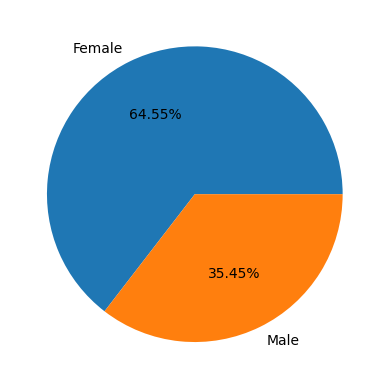

In [171]:
plt.pie(Demo_Gen.Gender, labels = Demo_Gen.index, autopct = '%1.2f%%', startangle = 360)
plt.show()

In [162]:
Demo_MS = (Films.Marital_Status.value_counts()/(Films.shape[0])*100).reset_index().set_index('index')
Demo_MS

,Marital_Status
index,
Single,69.69697
Married,30.30303


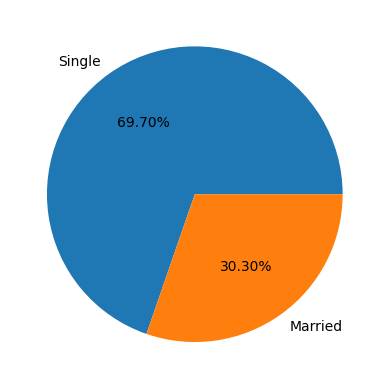

In [170]:
plt.pie(Demo_MS.Marital_Status, labels = Demo_MS.index, autopct = '%1.2f%%', startangle = 360)
plt.show()

In [177]:
Demo_Age = (Films.Age.value_counts()/(Films.shape[0])*100).reset_index().set_index('index')
Demo_Age

,Age
index,
2.0,53.636364
3.0,35.454545
1.0,7.878788
4.0,3.030303


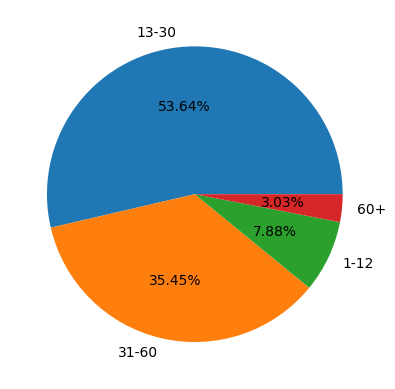

In [178]:
plt.pie(Demo_Age.Age, labels = ['13-30','31-60','1-12','60+'], autopct = '%1.2f%%', startangle = 360)
plt.show()

In [179]:
Demo_Income = (Films.Income.value_counts()/(Films.shape[0])*100).reset_index().set_index('index')
Demo_Income

,Income
index,
1.0,47.878788
3.0,27.272727
2.0,24.848485


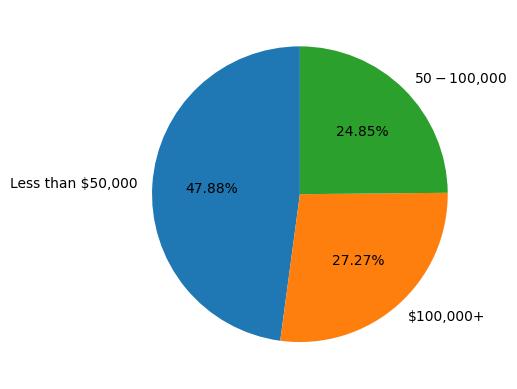

In [200]:
plt.pie(Demo_Income.Income, labels = ['Less than $50,000','$100,000+','$50-$100,000'], autopct = '%1.2f%%', startangle = 90 )
plt.show()

#### In what media outlet(s) should the film series be advertised?

In [231]:
Films.Hear_About.value_counts()

5      233
4       41
1       22
3       14
2       12
2,5      2
3,4      2
4,5      1
1,5      1
5,4      1
3,5      1
Name: Hear_About, dtype: int64

In [233]:
Films.Hear_About.value_counts().reset_index().iloc[0,0]

'5'

##### We got 5, it means 'word of mouth' , so, the film series should be advertised by 'word of mouth'.